<a href="https://colab.research.google.com/github/Ameya22Joshi/End-to-End-Sentence-Level-Lip-Reading-System/blob/main/LipReading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [1]:
!pip install tensorflow==2.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 67.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2

In [2]:
!pip install opencv-python matplotlib imageio gdown

In [3]:
!pip install imageio==2.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6


In [4]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [5]:
import gdown

In [6]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From: https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
To: /content/data.zip
100%|██████████| 423M/423M [00:07<00:00, 56.4MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [7]:
def load_video(path:str) -> List[float]:

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [8]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [9]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [10]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [12]:
char_to_num(['a','m','e','y','a'])

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 1, 13,  5, 25,  1])>

In [13]:
num_to_char([ 1, 13,  5, 25,  1])

<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'a', b'm', b'e', b'y', b'a'], dtype=object)>

In [14]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

    # File name splitting for windows
    file_name = path.split('\\')[-1].split('.')[0]

In [15]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    video_path = os.path.join('data', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')
    # print('path: ',path)
    # print("file_name:",file_name)
    # print("Video Path:", video_path)
    # print("Alignment Path:", alignment_path)

    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments


In [19]:
test_path = 'data/s1/bbal6n.mpg'

In [20]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [21]:
load_data(tf.convert_to_tensor(test_path))

(<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
 array([[[[ 1.460374  ],
          [ 1.460374  ],
          [ 1.4209044 ],
          ...,
          [ 0.15787826],
          [ 0.19734783],
          [ 0.07893913]],
 
         [[ 1.460374  ],
          [ 1.460374  ],
          [ 1.4209044 ],
          ...,
          [ 0.15787826],
          [ 0.07893913],
          [ 0.03946957]],
 
         [[ 1.4209044 ],
          [ 1.4209044 ],
          [ 1.3814349 ],
          ...,
          [ 0.07893913],
          [ 0.07893913],
          [ 0.07893913]],
 
         ...,
 
         [[ 0.9472696 ],
          [ 0.9472696 ],
          [ 0.9472696 ],
          ...,
          [ 9.946331  ],
          [ 9.867392  ],
          [ 9.867392  ]],
 
         [[ 0.9472696 ],
          [ 0.9472696 ],
          [ 0.9472696 ],
          ...,
          [ 9.906861  ],
          [ 9.867392  ],
          [ 9.867392  ]],
 
         [[ 0.9472696 ],
          [ 0.9472696 ],
          [ 0.9472696 ],
          

In [22]:
frames_test, alignments_test = load_data(tf.convert_to_tensor(test_path))

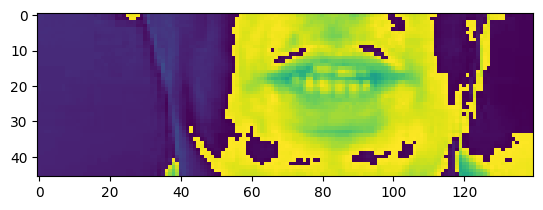

In [24]:
plt.imshow(frames_test[40])

In [26]:
alignments_test

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [28]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments_test.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [29]:
from typing import Tuple
def mappable_function(path:str) ->Tuple[tf.Tensor, tf.Tensor]:

    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result


In [30]:
# rm -rf "find -type d -name .ipynb_checkpoints"
# rm -rf 'find -L -type d -name .ipynb_checkpoints'
!find /content/data -type d -name .ipynb_checkpoints -exec rm -rf {} \;



find: ‘/content/data/s1/.ipynb_checkpoints’: No such file or directory


In [31]:
data = tf.data.Dataset.list_files('./data/s1/*')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split
train = data.take(450)
test = data.skip(450)

In [38]:
len(test)

50

In [39]:
data.as_numpy_iterator().next()

(array([[[[[1.2586148 ],
           [1.2586148 ],
           [1.2586148 ],
           ...,
           [0.5899757 ],
           [0.550644  ],
           [0.43264884]],
 
          [[1.2586148 ],
           [1.2586148 ],
           [1.2586148 ],
           ...,
           [0.5899757 ],
           [0.550644  ],
           [0.43264884]],
 
          [[1.1406196 ],
           [1.1406196 ],
           [1.1406196 ],
           ...,
           [0.5899757 ],
           [0.47198057],
           [0.51131225]],
 
          ...,
 
          [[0.74730253],
           [0.74730253],
           [0.74730253],
           ...,
           [0.8652977 ],
           [1.0226245 ],
           [0.74730253]],
 
          [[0.74730253],
           [0.74730253],
           [0.74730253],
           ...,
           [0.8652977 ],
           [0.78663427],
           [0.94396114]],
 
          [[0.74730253],
           [0.74730253],
           [0.74730253],
           ...,
           [0.825966  ],
           [0.825966  

In [40]:
frames, alignments = data.as_numpy_iterator().next()

In [41]:
len(frames)

2

In [42]:
sample = data.as_numpy_iterator()

In [43]:
val = sample.next(); val[0]

array([[[[[ 1.2658285 ],
          [ 1.2658285 ],
          [ 1.3425453 ],
          ...,
          [ 9.627968  ],
          [ 9.781402  ],
          [ 9.743043  ]],

         [[ 1.2658285 ],
          [ 1.2658285 ],
          [ 1.3425453 ],
          ...,
          [ 9.474534  ],
          [ 9.743043  ],
          [ 0.        ]],

         [[ 1.22747   ],
          [ 1.22747   ],
          [ 1.22747   ],
          ...,
          [ 0.        ],
          [ 0.        ],
          [ 0.        ]],

         ...,

         [[ 0.88224405],
          [ 0.88224405],
          [ 0.88224405],
          ...,
          [ 9.551251  ],
          [ 9.551251  ],
          [ 9.551251  ]],

         [[ 0.88224405],
          [ 0.88224405],
          [ 0.88224405],
          ...,
          [ 9.512893  ],
          [ 9.512893  ],
          [ 9.512893  ]],

         [[ 0.88224405],
          [ 0.88224405],
          [ 0.88224405],
          ...,
          [ 9.512893  ],
          [ 9.512893  ],
          

In [44]:
imageio.mimsave('./animation.gif', val[0][0], fps=10)

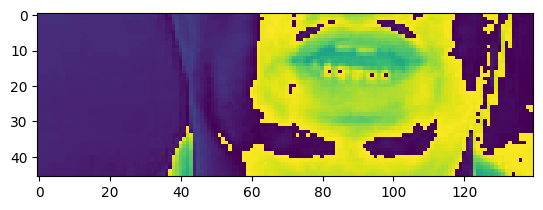

In [45]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video
plt.imshow(val[0][0][16])

In [46]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'set red in h two please'>

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [48]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [49]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [51]:
yhat = model.predict(val[0])

1/1 [==============================] - 21s 21s/step


In [52]:
yhat

array([[[0.02278264, 0.02614795, 0.02463111, ..., 0.02119293,
         0.02553258, 0.0244227 ],
        [0.02129902, 0.02645687, 0.02384567, ..., 0.02048196,
         0.02454032, 0.02513755],
        [0.02004295, 0.02676426, 0.02318114, ..., 0.01981705,
         0.02371154, 0.02598724],
        ...,
        [0.01539824, 0.03010554, 0.02364141, ..., 0.01855199,
         0.02131269, 0.02887611],
        [0.01565234, 0.03046041, 0.0235899 , ..., 0.01858101,
         0.0209996 , 0.0287853 ],
        [0.01615245, 0.03080401, 0.02382663, ..., 0.01891412,
         0.02069318, 0.02840669]],

       [[0.02656044, 0.02656085, 0.02772127, ..., 0.02050936,
         0.02016131, 0.02352045],
        [0.02450365, 0.02786435, 0.02760195, ..., 0.01988399,
         0.0192384 , 0.02450637],
        [0.02294399, 0.02840333, 0.02736802, ..., 0.01948047,
         0.01856429, 0.02533423],
        ...,
        [0.01815534, 0.02676798, 0.02472646, ..., 0.01891486,
         0.019828  , 0.02600073],
        [0.0

In [53]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'22222222hhhhhhhhh2222hhhhhhhhhhhhhh222222222222222222222222222uuuuuhhhhhhhh'>

In [54]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'22222222hhhhhhhhh2222hhhhhhhhhhhhhh222222222222222222222222222uuuuuhhhhhhhh'>

In [55]:
model.input_shape

(None, 75, 46, 140, 1)

In [56]:
model.output_shape

(None, 75, 41)

In [57]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [58]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [59]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        print("\n Input Shape:", data[0].shape)
        print("\n Label Shape:", data[1].shape)

        yhat = self.model.predict(data[0])
        print("Output Shape:", yhat.shape)

        decoded = tf.keras.backend.ctc_decode(yhat, [75, 75], greedy=False)[0][0].numpy()

        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~' * 100)


In [60]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [61]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)

In [62]:
schedule_callback = LearningRateScheduler(scheduler)

In [63]:
example_callback = ProduceExample(test)

In [64]:
model.fit(train, epochs=3, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/3
450/450 [==============================] - ETA: 0s - loss: 83.7075
 Input Shape: (2, 75, 46, 140, 1)

 Label Shape: (2, 40)
1/1 [==============================] - 3s 3s/step
Output Shape: (2, 75, 41)
Original: place green with y eight now
Prediction: le e e n o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set red in a eight please
Prediction: le e e n o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 729s 2s/step - loss: 83.7075 - lr: 1.0000e-04
Epoch 2/3
450/450 [==============================] - ETA: 0s - loss: 70.6936
 Input Shape: (2, 75, 46, 140, 1)

 Label Shape: (2, 40)
1/1 [==============================] - 0s 216ms/step
Output Shape: (2, 75, 41)
Original: set red in h three again
Prediction: la e e e t e eo
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
O

In [65]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From: https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
To: /content/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:00<00:00, 183MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [66]:
model.load_weights('models/checkpoint')

In [67]:
test_data = test.as_numpy_iterator()

In [68]:
sample = test_data.next()

In [69]:
yhat = model.predict(sample[0])

1/1 [==============================] - 0s 293ms/step


In [70]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'set blue in g four now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay green with t two please'>]

In [71]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [72]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'set blue in g four now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay green with t two please'>]

In [76]:
sample =load_data(tf.convert_to_tensor('./data/s1/bras9a.mpg'))

In [77]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [78]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 1s 1s/step


In [79]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [80]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [81]:
pip install protobuf==3.20.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.3.3 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery 3.12.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-clou

In [82]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 114.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


In [83]:
!wget -q -O - ipv4.icanhazip.com

34.66.192.186


In [84]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.66.192.186:8501

npx: installed 22 in 4.293s
your url is: https://tasty-dancers-cross.loca.lt
2023-11-23 15:19:02.476779: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 15:19:03.263014: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-11-23 15:19:03.263128: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr